<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Transformer/12_transformer_huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HuggingFace Transformers - NLP Tasks

This notebook demonstrates how to perform various NLP tasks using the HuggingFace Transformers library. We'll explore:
1. Translation
2. Summarization
3. Text Generation
4. Sentiment Analysis
5. Question Answering
6. Named Entity Recognition (NER)
7. Text Classification
8. Fill-Mask (Masked Language Modeling)
9. Feature Extraction
10. Zero-shot Classification
11. Text-to-Image Generation
12. Automatic Speech Recognition
13. Image Classification
14. Object Detection

## Setup

First, let's install required dependencies:

In [4]:
%pip install -q sentencepiece transformers torch
%pip install -q timm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [5]:
from transformers import pipeline, AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import time
from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')

## Task Configuration and Execution

Below we define the models and tokenizers for each NLP task and execute them one by one.

Using device: GPU

--------------------------------------------------
Running task 1/14: translation
--------------------------------------------------
Loading model: Helsinki-NLP/opus-mt-en-de
Model loaded in 2.22 seconds

Example 1:
----------
Original (English): Hello, how are you doing today?
Translation (German): Hallo, wie geht's dir heute?

Example 2:
----------
Original (English): Artificial intelligence is transforming the world.
Translation (German): Künstliche Intelligenz verwandelt die Welt.

--------------------------------------------------
Running task 2/14: summarization
--------------------------------------------------
Loading model: facebook/bart-large-cnn
Model loaded in 2.45 seconds

Example 1:
----------
Input: Artificial intelligence (AI) is intelligence demonstrated by machines, 
            in contrast to t...
Summary: Artificial intelligence (AI) is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals. 

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Model loaded in 1.69 seconds

Example 1:
----------
Prompt: Once upon a time


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generated: Once upon a time, you read a book. Now it’s your turn to read another. You’re a writer, and you’re a reader. You have a job, a family, and you have a life.

Example 2:
----------
Prompt: The future of artificial intelligence
Generated: The future of artificial intelligence is a matter of debate. Does this mean that every machine learning system should be equipped with a self-driving robot? Or does it mean that the robot should not be equipped with a self-driving platform? The question is

--------------------------------------------------
Running task 4/14: sentiment-analysis
--------------------------------------------------
Loading model: distilbert-base-uncased-finetuned-sst-2-english
Model loaded in 0.56 seconds

Example 1:
----------
Text: I love using HuggingFace Transformers!
Sentiment: POSITIVE, Score: 0.9898

Example 2:
----------
Text: This movie was terrible and disappointing.
Sentiment: NEGATIVE, Score: 0.9998

Example 3:
----------
Text: The experience was neith

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded in 1.44 seconds

Example 1:
----------
Text: HuggingFace is based in New York City.
Entity: 'Hu', Type: I-ORG, Score: 0.9961
Entity: '##gging', Type: I-ORG, Score: 0.9750
Entity: '##F', Type: I-ORG, Score: 0.9963
Entity: '##ace', Type: I-ORG, Score: 0.9924
Entity: 'New', Type: I-LOC, Score: 0.9990
Entity: 'York', Type: I-LOC, Score: 0.9990
Entity: 'City', Type: I-LOC, Score: 0.9994

Example 2:
----------
Text: Apple CEO Tim Cook announced new products at their headquarters in Cupertino, California.
Entity: 'Apple', Type: I-ORG, Score: 0.9984
Entity: 'Tim', Type: I-PER, Score: 0.9996
Entity: 'Cook', Type: I-PER, Score: 0.9997
Entity: 'Cup', Type: I-LOC, Score: 0.9963
Entity: '##ert', Type: I-LOC, Score: 0.9089
Entity: '##ino', Type: I-LOC, Score: 0.9948
Entity: 'California', Type: I-LOC, Score: 0.9992

--------------------------------------------------
Running task 7/14: text-classification
--------------------------------------------------
Loading model: bert-base-uncased


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded in 0.70 seconds

Example 1:
----------
Text: HuggingFace is amazing!
Classification: LABEL_0, Score: 0.6780

Example 2:
----------
Text: Machine learning models require significant computational resources.
Classification: LABEL_0, Score: 0.5386

--------------------------------------------------
Running task 8/14: fill-mask
--------------------------------------------------
Loading model: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded in 1.11 seconds

Example 1:
----------
Masked text: Paris is the [MASK] of France.
Prediction 1: 'capital' with score: 0.9969
Prediction 2: 'heart' with score: 0.0006
Prediction 3: 'center' with score: 0.0004

Example 2:
----------
Masked text: The [MASK] reported record profits this quarter.
Prediction 1: 'company' with score: 0.2578
Prediction 2: 'club' with score: 0.0642
Prediction 3: 'group' with score: 0.0414

--------------------------------------------------
Running task 9/14: feature-extraction
--------------------------------------------------
Loading model: sentence-transformers/paraphrase-MiniLM-L6-v2
Model loaded in 0.40 seconds

Example 1:
----------
Text: This is a sentence for feature extraction.
Embedding shape: (10, 384)
Embedding sample (first 5 values): [[-0.011915473267436028, -0.07030805200338364, 0.16787724196910858, -0.07062871009111404, 0.353752464056015, 0.039146024733781815, -0.01615794748067856, -0.43071994185447693, -0.09094761312007904, -0.1644

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Model loaded in 1.31 seconds

Example 1:
----------
Image: https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg


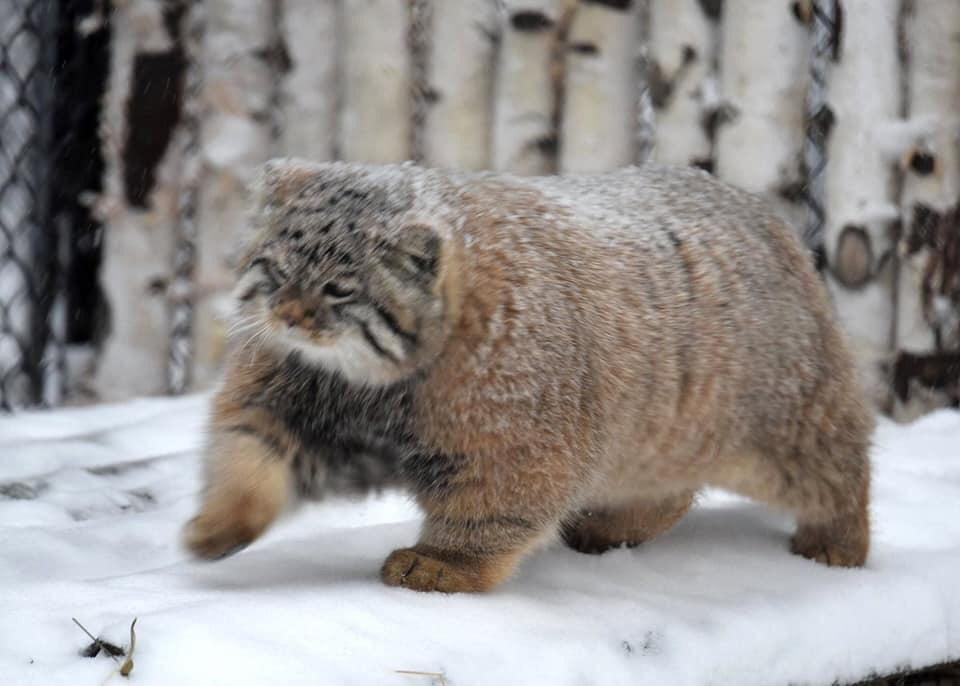

Class 1: lynx, catamount (Score: 0.4403)
Class 2: cougar, puma, catamount, mountain lion, painter, panther, Felis concolor (Score: 0.0343)
Class 3: snow leopard, ounce, Panthera uncia (Score: 0.0321)

--------------------------------------------------
Running task 14/14: object-detection
--------------------------------------------------
Note: object-detection requires additional packages.
Loading model: facebook/detr-resnet-50


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded in 1.25 seconds

Example 1:
----------
Image: https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg


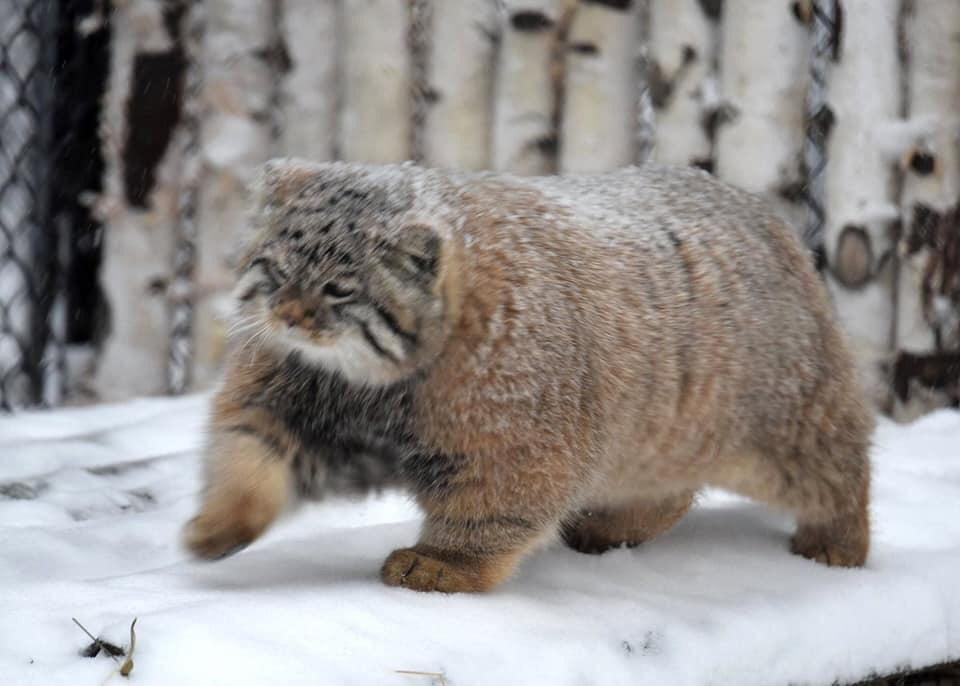

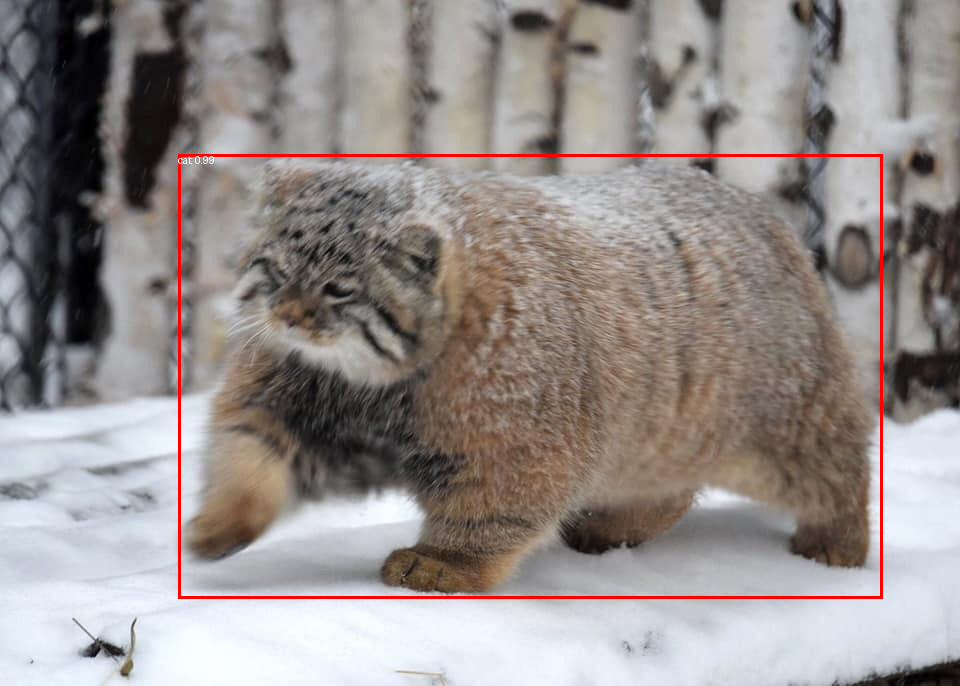

Detected objects:
Object 1: cat (Score: 0.9866)

All tasks completed.


In [6]:
# Configuration for tasks and their respective models and tokenizers
tasks = {
    "translation": {
        "model": "Helsinki-NLP/opus-mt-en-de",
        "tokenizer": "Helsinki-NLP/opus-mt-en-de",
        "examples": [
            "Hello, how are you doing today?",
            "Artificial intelligence is transforming the world."
        ]
    },
    "summarization": {
        "model": "facebook/bart-large-cnn",
        "tokenizer": "facebook/bart-large-cnn",
        "examples": [
            """Artificial intelligence (AI) is intelligence demonstrated by machines, 
            in contrast to the natural intelligence displayed by humans and animals. 
            Leading AI textbooks define the field as the study of 'intelligent agents': 
            any device that perceives its environment and takes actions that maximize 
            its chance of successfully achieving its goals. Colloquially, the term 'artificial intelligence' 
            is often used to describe machines that mimic 'cognitive' functions that humans associate with 
            the human mind, such as 'learning' and 'problem solving'."""
        ]
    },
    "text-generation": {
        "model": "EleutherAI/gpt-neo-125M",
        "tokenizer": "EleutherAI/gpt-neo-125M",
        "examples": [
            "Once upon a time",
            "The future of artificial intelligence"
        ]
    },
    "sentiment-analysis": {
        "model": "distilbert-base-uncased-finetuned-sst-2-english",
        "tokenizer": "distilbert-base-uncased-finetuned-sst-2-english",
        "examples": [
            "I love using HuggingFace Transformers!",
            "This movie was terrible and disappointing.",
            "The experience was neither good nor bad."
        ]
    },
    "question-answering": {
        "model": "distilbert-base-cased-distilled-squad",
        "tokenizer": "distilbert-base-cased-distilled-squad",
        "examples": [
            {"context": "HuggingFace is creating a tool that democratizes AI.", "question": "What is HuggingFace creating?"},
            {"context": "The capital of France is Paris. It is known for the Eiffel Tower.", "question": "What is the capital of France?"}
        ]
    },
    "ner": {
        "model": "dbmdz/bert-large-cased-finetuned-conll03-english",
        "tokenizer": "dbmdz/bert-large-cased-finetuned-conll03-english",
        "examples": [
            "HuggingFace is based in New York City.",
            "Apple CEO Tim Cook announced new products at their headquarters in Cupertino, California."
        ]
    },
    "text-classification": {
        "model": "bert-base-uncased",
        "tokenizer": "bert-base-uncased",
        "examples": [
            "HuggingFace is amazing!",
            "Machine learning models require significant computational resources."
        ]
    },
    "fill-mask": {
        "model": "bert-base-uncased",
        "tokenizer": "bert-base-uncased",
        "examples": [
            "Paris is the [MASK] of France.",
            "The [MASK] reported record profits this quarter."
        ]
    },
    "feature-extraction": {
        "model": "sentence-transformers/paraphrase-MiniLM-L6-v2",
        "tokenizer": "sentence-transformers/paraphrase-MiniLM-L6-v2",
        "examples": [
            "This is a sentence for feature extraction.",
            "Another sentence to encode into embeddings."
        ]
    },
    "zero-shot-classification": {
        "model": "facebook/bart-large-mnli",
        "tokenizer": "facebook/bart-large-mnli",
        "examples": [
            {"text": "I have a problem with my Galuxy phone that needs to be resolved asap!!", "labels": ["urgent", "not urgent", "phone", "computer", "billing", "technical support"]},
            {"text": "Looking to upgrade my plan for better value", "labels": ["sales", "support", "billing", "technical support"]}
        ]
    },
    "text-to-image": {
        "model": "runwayml/stable-diffusion-v1-5",
        "tokenizer": "runwayml/stable-diffusion-v1-5",
        "examples": [
            "A cute cat sitting on a chair",
            "A landscape photo of mountains at sunset"
        ]
    },
    "automatic-speech-recognition": {
        "model": "openai/whisper-small",
        "tokenizer": "openai/whisper-small",
        "examples": [
            "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/1.flac"
        ]
    },
    "image-classification": {
        "model": "google/vit-base-patch16-224",
        "tokenizer": "google/vit-base-patch16-224",
        "examples": [
            "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
        ]
    },
    "object-detection": {
        "model": "facebook/detr-resnet-50",
        "tokenizer": "facebook/detr-resnet-50",
        "examples": [
            "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
        ]
    }
}

# Determine device: GPU if available, otherwise CPU
device = 0 if torch.cuda.is_available() else -1
print(f"Using device: {'GPU' if device == 0 else 'CPU'}")

# Define a list of tasks that require additional packages
special_tasks = ["text-to-image", "automatic-speech-recognition", "image-classification", "object-detection"]

# Progress tracking
total_tasks = len(tasks)
completed_tasks = 0

# Iterate through tasks and execute corresponding pipelines
for task_name, task_config in tasks.items():
    completed_tasks += 1
    print(f"\n{'-' * 50}\nRunning task {completed_tasks}/{total_tasks}: {task_name}\n{'-' * 50}")
    
    try:
        # Check if task requires special handling
        if task_name in special_tasks:
            print(f"Note: {task_name} requires additional packages.")
            try:
                # Measure model loading time
                start_time = time.time()
                model_name = task_config["model"]
                tokenizer_name = task_config["tokenizer"]
                
                print(f"Loading model: {model_name}")
                nlp_pipeline = pipeline(
                    task_name,
                    model=model_name,
                    device=device,
                    framework="pt"
                )
                loading_time = time.time() - start_time
                print(f"Model loaded in {loading_time:.2f} seconds")
                
                # Handle specific task execution
                if task_name == "text-to-image":
                    for i, prompt in enumerate(task_config["examples"]):
                        if i >= 1:  # Limit to 1 example to save resources
                            print("Skipping additional examples to save resources...")
                            break
                        print(f"\nExample {i+1}:\n{'-' * 10}")
                        print(f"Prompt: {prompt}")
                        try:
                            print("Generating image (this might take a while)...")
                            image = nlp_pipeline(prompt)
                            display(image[0])
                        except Exception as img_err:
                            print(f"Error generating image: {str(img_err)}")
                
                elif task_name == "image-classification":
                    for i, image_url in enumerate(task_config["examples"]):
                        print(f"\nExample {i+1}:\n{'-' * 10}")
                        print(f"Image: {image_url}")
                        try:
                            import requests
                            from PIL import Image as PILImage
                            from io import BytesIO
                            
                            # Download and display the image
                            response = requests.get(image_url)
                            img = PILImage.open(BytesIO(response.content))
                            display(img)
                            
                            # Classify the image
                            result = nlp_pipeline(img)
                            for j, res in enumerate(result[:3]):
                                print(f"Class {j+1}: {res['label']} (Score: {res['score']:.4f})")
                        except Exception as img_err:
                            print(f"Error processing image: {str(img_err)}")
                
                elif task_name == "object-detection":
                    for i, image_url in enumerate(task_config["examples"]):
                        print(f"\nExample {i+1}:\n{'-' * 10}")
                        print(f"Image: {image_url}")
                        try:
                            import requests
                            from PIL import Image as PILImage, ImageDraw
                            from io import BytesIO
                            
                            # Download and display the image
                            response = requests.get(image_url)
                            img = PILImage.open(BytesIO(response.content))
                            display(img)
                            
                            # Detect objects
                            result = nlp_pipeline(img)
                            
                            # Draw boxes on a copy of the image
                            img_with_boxes = img.copy()
                            draw = ImageDraw.Draw(img_with_boxes)
                            for detection in result:
                                box = detection['box']
                                x, y, w, h = box['xmin'], box['ymin'], box['xmax'] - box['xmin'], box['ymax'] - box['ymin']
                                draw.rectangle([(x, y), (x + w, y + h)], outline="red", width=3)
                                draw.text((x, y), f"{detection['label']}: {detection['score']:.2f}", fill="white")
                            
                            # Display the image with bounding boxes
                            display(img_with_boxes)
                            
                            # Print detection results
                            print("Detected objects:")
                            for j, obj in enumerate(result):
                                print(f"Object {j+1}: {obj['label']} (Score: {obj['score']:.4f})")
                        except Exception as img_err:
                            print(f"Error processing image: {str(img_err)}")
                            
                elif task_name == "automatic-speech-recognition":
                    for i, audio_url in enumerate(task_config["examples"]):
                        print(f"\nExample {i+1}:\n{'-' * 10}")
                        print(f"Audio file: {audio_url}")
                        try:
                            import requests
                            print("Downloading audio file...")
                            audio_data = requests.get(audio_url).content
                            with open('temp_audio.flac', 'wb') as f:
                                f.write(audio_data)
                            print("Transcribing audio...")
                            transcription = nlp_pipeline('temp_audio.flac')
                            print(f"Transcription: {transcription['text']}")
                        except Exception as audio_err:
                            print(f"Error processing audio: {str(audio_err)}")
            except ImportError as imp_err:
                print(f"Could not import required packages for {task_name}: {str(imp_err)}")
                print(f"To run this task successfully, you may need to install additional packages.")
            except Exception as task_err:
                print(f"Error setting up {task_name} pipeline: {str(task_err)}")
            continue
        
        # Standard pipeline setup for non-special tasks
        start_time = time.time()
        model_name = task_config["model"]
        tokenizer_name = task_config["tokenizer"]
        
        print(f"Loading model: {model_name}")
        nlp_pipeline = pipeline(
            task_name,
            model=model_name,
            tokenizer=tokenizer_name,
            device=device,
            framework="pt"
        )
        loading_time = time.time() - start_time
        print(f"Model loaded in {loading_time:.2f} seconds")
        
        # Task-specific handling
        if task_name == "summarization":
            for i, text in enumerate(task_config["examples"]):
                print(f"\nExample {i+1}:\n{'-' * 10}")
                print(f"Input: {text[:100]}...")
                summary = nlp_pipeline(text, max_length=50, min_length=10, do_sample=False)
                print(f"Summary: {summary[0]['summary_text']}")
                
        elif task_name == "text-generation":
            for i, prompt in enumerate(task_config["examples"]):
                print(f"\nExample {i+1}:\n{'-' * 10}")
                print(f"Prompt: {prompt}")
                generated_text = nlp_pipeline(prompt, max_length=50, do_sample=True, temperature=0.7)
                print(f"Generated: {generated_text[0]['generated_text']}")
                
        elif task_name == "sentiment-analysis":
            for i, text in enumerate(task_config["examples"]):
                print(f"\nExample {i+1}:\n{'-' * 10}")
                print(f"Text: {text}")
                sentiment = nlp_pipeline(text)
                print(f"Sentiment: {sentiment[0]['label']}, Score: {sentiment[0]['score']:.4f}")
                
        elif task_name == "question-answering":
            for i, example in enumerate(task_config["examples"]):
                print(f"\nExample {i+1}:\n{'-' * 10}")
                print(f"Context: {example['context']}")
                print(f"Question: {example['question']}")
                answer = nlp_pipeline(question=example['question'], context=example['context'])
                print(f"Answer: '{answer['answer']}' (Score: {answer['score']:.4f})")
                
        elif task_name == "ner":
            for i, text in enumerate(task_config["examples"]):
                print(f"\nExample {i+1}:\n{'-' * 10}")
                print(f"Text: {text}")
                entities = nlp_pipeline(text)
                for entity in entities:
                    print(f"Entity: '{entity['word']}', Type: {entity['entity']}, Score: {entity['score']:.4f}")
                    
        elif task_name == "text-classification":
            for i, text in enumerate(task_config["examples"]):
                print(f"\nExample {i+1}:\n{'-' * 10}")
                print(f"Text: {text}")
                classification = nlp_pipeline(text)
                print(f"Classification: {classification[0]['label']}, Score: {classification[0]['score']:.4f}")
                
        elif task_name == "translation":
            for i, text in enumerate(task_config["examples"]):
                print(f"\nExample {i+1}:\n{'-' * 10}")
                print(f"Original (English): {text}")
                translation = nlp_pipeline(text)
                print(f"Translation (German): {translation[0]['translation_text']}")
                
        elif task_name == "fill-mask":
            for i, text in enumerate(task_config["examples"]):
                print(f"\nExample {i+1}:\n{'-' * 10}")
                print(f"Masked text: {text}")
                predictions = nlp_pipeline(text, top_k=3)
                if isinstance(predictions[0], list):
                    for pred_set in predictions:
                        for j, pred in enumerate(pred_set[:3]):
                            print(f"Prediction {j+1}: '{pred['token_str']}' with score: {pred['score']:.4f}")
                else:
                    for j, pred in enumerate(predictions[:3]):
                        print(f"Prediction {j+1}: '{pred['token_str']}' with score: {pred['score']:.4f}")
        
        elif task_name == "feature-extraction":
            for i, text in enumerate(task_config["examples"]):
                print(f"\nExample {i+1}:\n{'-' * 10}")
                print(f"Text: {text}")
                features = nlp_pipeline(text)
                # Convert features to numpy if they're tensors
                if hasattr(features[0], 'shape'):
                    shape = features[0].shape
                else:
                    import numpy as np
                    shape = np.array(features[0]).shape
                print(f"Embedding shape: {shape}")
                print(f"Embedding sample (first 5 values): {features[0][:5]}")
        
        elif task_name == "zero-shot-classification":
            for i, example in enumerate(task_config["examples"]):
                print(f"\nExample {i+1}:\n{'-' * 10}")
                print(f"Text: {example['text']}")
                print(f"Candidate labels: {example['labels']}")
                result = nlp_pipeline(example['text'], candidate_labels=example['labels'])
                for j, label in enumerate(result['labels'][:3]):
                    print(f"Label {j+1}: {label} (Score: {result['scores'][j]:.4f})")
        
        else:
            print(f"Task {task_name} implementation details not specified.")
            
    except Exception as e:
        print(f"Error processing task '{task_name}': {str(e)}")
        print("This is expected for some specialized tasks that require additional dependencies.")
        print("To run this task, you may need to install extra packages or use a different environment.")
        
print("\nAll tasks completed.")

## Conclusion

This notebook demonstrated how to use HuggingFace Transformers for various NLP tasks. The library provides a simple interface for accessing state-of-the-art models through the pipeline API.

Key points:
- Each task uses a specialized pre-trained model
- The pipeline API simplifies model inference
- Models can be run on CPU or GPU
- Different tasks require different input formats
- Visual tasks (image classification, object detection) require additional libraries
- Processing time and resource requirements vary by task

For more information, visit [HuggingFace Transformers documentation](https://huggingface.co/transformers/).

To explore the thousands of pre-trained models available, visit the [HuggingFace Model Hub](https://huggingface.co/models).